# kt유동인구데이터
- 행정동별 생활인구 데이터
- 데이터 정의 : 시간대 - 행정동- 성별- 연령 구분에 따른 생활인구 데이터

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family = 'Malgun Gothic')
%matplotlib inline

In [2]:
df = pd.read_csv('../KT_빅데이터플랫폼_데이터셋/popl.csv')

df.head()

df.columns=['기준년월일','24시간대구분코드','성별구분코드','연령대구분코드','행정동코드','내국인수','장기외국인수','단기외국인수','noting']



#숫자를 문자로 먼저 바꾼다
df['기준년월일'] = df['기준년월일'].apply(lambda x: str(x))



df['월'] = df['기준년월일'].apply(lambda x: x[4:6])

# 문자를 datetime으로 바꾸면 형식 제대로 나옴
df['기준년월일'] = pd.to_datetime(df['기준년월일'])

# 월별 내국인수 합계
popl = df.groupby(['월','성별구분코드','연령대구분코드','24시간대구분코드'])['내국인수'].sum()

popl = pd.DataFrame(popl)

In [3]:
popl.to_csv('testfile.csv',encoding = 'utf-8')

In [4]:
popl

내국인수
월  성별구분코드 연령대구분코드 24시간대구분코드        
01 -      _       0               0
                  1               0
                  2               0
                  3               0
                  4               0
...                             ...
06 M      age_70  19         825054
                  20         822883
                  21         821001
                  22         818791
                  23         816751

[3888 rows x 1 columns]

In [5]:
popl = popl.sort_values(by=['내국인수'])['내국인수'].reset_index()

In [6]:
popl

,월,성별구분코드,연령대구분코드,24시간대구분코드,내국인수
0,01,-,_,0,0
1,06,-,_,16,0
2,06,-,_,15,0
3,06,-,_,14,0
4,06,-,_,13,0
...,...,...,...,...,...
3883,04,F,age_25,17,2716057
3884,04,F,age_25,13,2723266
3885,04,F,age_25,16,2725556
3886,04,F,age_25,15,2727984


In [7]:
popl = popl.sort_values(by='월')

In [8]:
popl

,월,성별구분코드,연령대구분코드,24시간대구분코드,내국인수
0,01,-,_,0,0
761,01,M,age_50,11,644399
762,01,M,age_50,12,645884
763,01,M,age_50,17,646074
764,01,M,age_50,13,647519
...,...,...,...,...,...
1893,06,F,age_45,23,1293726
1892,06,M,age_40,6,1293035
1891,06,F,age_55,6,1293033
1902,06,F,age_55,7,1299757


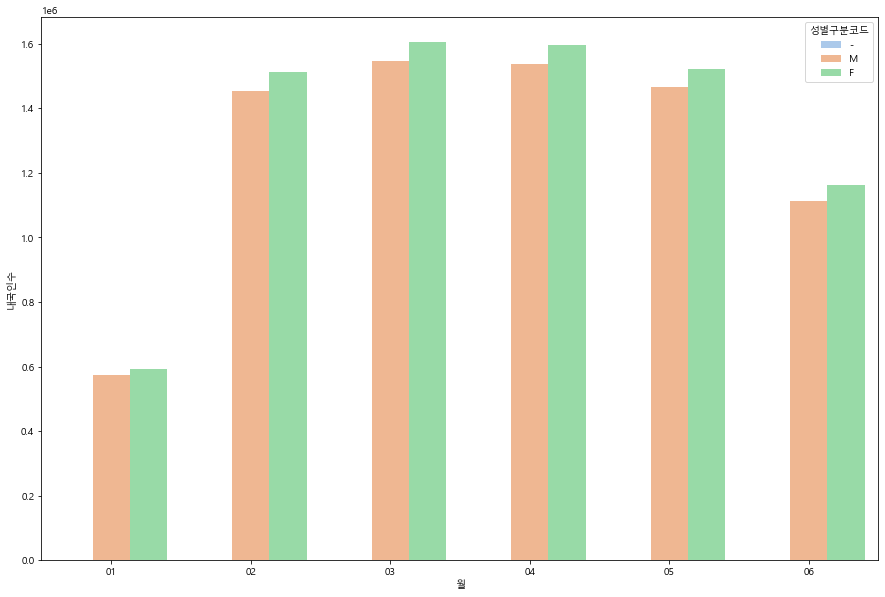

In [9]:
#월별 내국인 유동인구는 유의미한 차이를 가질수없음(1월데이터가 없는정도)
plt.figure(figsize = (15,10))
sns.barplot(x = '월',y='내국인수',hue='성별구분코드',data=popl, ci=None, palette ='pastel')
plt.show()

In [125]:
df['단기외국인수'].unique()

array([   0,   30,    8, ..., 1159, 1124, 1145], dtype=int64)

In [10]:
forign1 = df.groupby(['월','성별구분코드','연령대구분코드','24시간대구분코드'])['단기외국인수'].sum()
forign1.head()

월   성별구분코드  연령대구분코드  24시간대구분코드
01  -       _        0            143138
                     1            144380
                     2            144928
                     3            145181
                     4            144947
Name: 단기외국인수, dtype: int64

In [132]:
forign1 = pd.DataFrame(forign1)
forign1 = forign1.sort_values(by=['단기외국인수'])['단기외국인수'].reset_index()
forign1 = forign1.sort_values(by='월')

In [146]:
forign1

,월,성별구분코드,연령대구분코드,24시간대구분코드,단기외국인수
1943,01,M,age_70,2,0
2566,01,F,age_25,19,0
2565,01,F,age_25,18,0
2564,01,F,age_20,11,0
2563,01,F,age_20,9,0
...,...,...,...,...,...
1097,06,F,age_50,10,0
1096,06,F,age_50,9,0
1095,06,F,age_50,8,0
1093,06,F,age_50,6,0


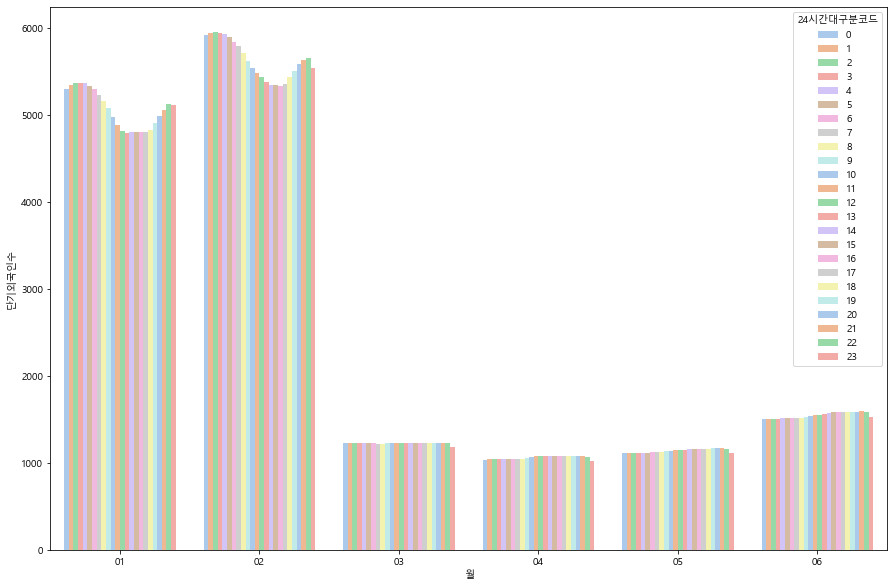

In [151]:
# 단기외국인 숫자는 3월 부터 현저히 줄어들은 것으로 보임
plt.figure(figsize = (15,10))
sns.barplot(x = '월',y='단기외국인수',hue='24시간대구분코드',data=forign1, ci=None, palette ='pastel')
plt.show()

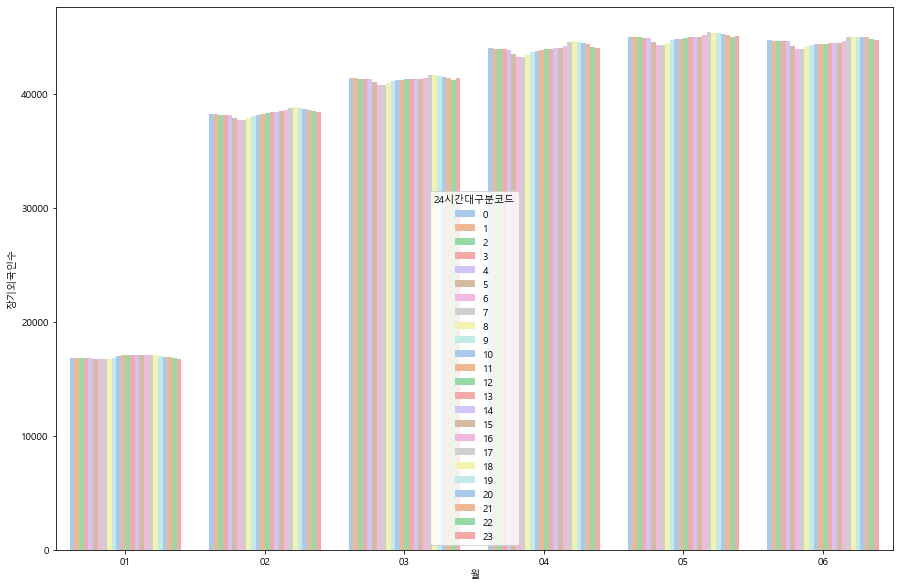

In [152]:
# 장기외국인수에 대한 데이터 변화는 유의미하다고 할수 없음
forign2 = df.groupby(['월','성별구분코드','연령대구분코드','24시간대구분코드'])['장기외국인수'].sum()
forign2 = pd.DataFrame(forign2)
forign2 = forign2.sort_values(by=['장기외국인수'])['장기외국인수'].reset_index()
forign2 = forign2.sort_values(by='월')
plt.figure(figsize = (15,10))
sns.barplot(x = '월',y='장기외국인수',hue='24시간대구분코드',data=forign2, ci=None, palette ='pastel')
plt.show()

단기외국인의 숫자가 여행과 같이 단순 취미,여가 목적에는 코로나로 인한 입국 허가로 인해 숫자가 현저히 줄어들었다고 볼수있다(주로 중국인들의 면세쇼핑 등을 예로 들수있음)
하지만, 장기외국인은 한국에서 노동을 하는사람들이 주로 이루기때문에 데이터가 줄지않은 모습이며, 오히려 본국으로 돌아가는것이 어려운것도 있을것 같다.
